In [50]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import time

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [401]:
path_root = '/Users/arefeh/Desktop/tweet_api_new/'

In [1]:
search_words = ["#Covid","#COVID AND #Fake","#COVIDVaccination",'#antiVax']
data_read = []
for search_word in search_words:
    path_read = path_root+'cleaned'+'/'+str(search_word)+'.txt'
    with open(path_read, 'r') as f:
        data_read.append(f.readlines())

In [55]:
def cosine_sim(v_1,v_2):
    cosine_similarity = np.dot(v_1, v_2)/(np.linalg.norm(v_1)* np.linalg.norm(v_2))
    return cosine_similarity

In [2]:
data_all = data_read[0]+data_read[1]+data_read[2]+data_read[3]

In [3]:
data_all = [item.rstrip('\n') for item in data_all]

In [4]:
del data_read

In [5]:
doc_sent = []
for item in data_all:
    doc_sent.append(item.split())

In [8]:
model = Word2Vec(min_count=1)
model.build_vocab(sentences=doc_sent)  # prepare the model vocabulary

In [9]:
model.train(sentences=doc_sent, total_examples=model.corpus_count, epochs=model.epochs)  # train word vectors

(49588731, 67013825)

In [23]:
model.save(path_root+'wv_models'+'/'+"word2vec.model")

In [10]:
print(model.similarity('covid','antivax'))
print(model.similarity('covid','vaccine'))

0.1451465050245679
0.33111827645344394


/Users/arefeh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/Users/arefeh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [14]:
model_path = path_root +'wv_models'+'/'

In [15]:
from gensim.models import KeyedVectors

In [16]:

# Store just the words + their trained embeddings.
word_vectors = model.wv
word_vectors.save(model_path+"word2vec.wordvectors")
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load(model_path+"word2vec.wordvectors", mmap='r')
vector = wv['computer']  # Get numpy vector of a word

In [17]:
wv = KeyedVectors.load(model_path+"word2vec.wordvectors", mmap='r')

In [18]:
def doc2vec(doc_sent):
    global wv
    vector_doc_sent = []
    for item in doc_sent.split():
        vector = np.zeros(100)
        n_words = 0
        for Jtem in item:
            if Jtem in wv.vocab:
                vector = wv[Jtem] + vector
                n_words = n_words + 1
        vector = vector/n_words
        vector_doc_sent.append(vector)
    return vector_doc_sent

In [19]:
def tweet2vec(tw_sent):
    global wv
    vector = np.zeros(100)
    n_words = 0
    for item in tw_sent.split(): 
        if item in wv.vocab:
            vector = wv[item] + vector
            n_words = n_words + 1
    if n_words>0:
        vector = vector/n_words
    return vector

In [31]:
date = list(pd.date_range(start="2020-01-10",end="2021-01-10"))
date_list = [str(item).split()[0] for item in date]

In [ ]:
search_words = ["#COVIDVaccination", "#antiVax","#Covid AND #Fake","#Covid","anti-vaccine","#Corona","#Covid19","#Covid-19"]
search_words = search_words[:4]
word_tw = []
index_tw = []
n = 0
for search_word in search_words:
    for ftem in date_list:
        main_path = path_root+str(search_word)+'/'+ftem+'/'
        number_of_files = sum(f.endswith('.txt') for f in os.listdir(main_path))
        #print(str(ftem)+str(number_of_files))
        for ntem in range(number_of_files):
            path = main_path+str(ntem)+'.txt'
            index_tw.append(str(ftem)+' '+str(number_of_files))
        n = n + 1
        if n%100 ==0:
            print(n)
            print(n/len(date_list))

In [44]:
search_words = ["#Covid","#COVID AND #Fake","#COVIDVaccination",'#antiVax']
data_read = []
for search_word in search_words:
    path_read = path_root+'cleaned'+'/'+str(search_word)+'.txt'
    with open(path_read, 'r') as f:
        data_read.append(f.readlines())

In [46]:
for i in range(len(data_read)):
    data_read[i] = [item.rstrip('\n') for item in data_read[i]]
    print(i)

0
1
2
3


In [51]:
vectors = []
i = 0
for item in data_read:
    print(len(item))
    vector_item = []
    print(i)
    m = 0
    for Jtem in item:
        vector_item.append(tweet2vec(Jtem))
        if m%10000 == 0:
            print(m/len(item))
        m = m +1
    #np.save('array.npy', data)
    vectors.append(vector_item)
    print('ready to write')
    #start = time.time()
    #np.savetxt('/Users/arefeh/Desktop/tweet_api/'+'wv_vectors'+'/'+str(search_words[i])+'.npy', vector_item, delimiter=",",fmt='%s')
    np.savetxt(path_root+'wv_vectors'+'/'+str(search_words[i])+'.txt', vector_item, delimiter=",",fmt='%s')
    #done = time.time()
    i = i+1

332536
0
0.0
0.030071932061491086
0.06014386412298217
0.09021579618447326
0.12028772824596434
0.15035966030745543
0.18043159236894651
0.2105035244304376
0.24057545649192869
0.2706473885534198
0.30071932061491086
0.33079125267640197
0.36086318473789303
0.39093511679938414
0.4210070488608752
0.4510789809223663
0.48115091298385737
0.5112228450453484
0.5412947771068396
0.5713667091683307
0.6014386412298217
0.6315105732913128
0.6615825053528039
0.691654437414295
0.7217263694757861
0.7517983015372771
0.7818702335987683
0.8119421656602593
0.8420140977217504
0.8720860297832416
0.9021579618447326
0.9322298939062237
0.9623018259677147
0.9923737580292059
ready to write
2395
1
0.0
ready to write
341795
2
0.0
0.02925730335434983
0.05851460670869966
0.08777191006304949
0.11702921341739932
0.14628651677174914
0.17554382012609898
0.2048011234804488
0.23405842683479863
0.26331573018914844
0.2925730335434983
0.3218303368978481
0.35108764025219796
0.3803449436065478
0.4096022469608976
0.4388595503152474


In [16]:
len(vectors)

4

In [ ]:
text_vec = np.loadtxt('/Users/arefeh/Desktop/tweet_api/'+'wv_vectors'+'/'+str(search_words[0])+'.npy',delimiter=",")
print(len(text_vec))
print(len(vectors[1]))

In [28]:
similarity_all = []

In [53]:
import time

In [93]:
#vector similarity to Vaccine
siminarity_all_ant = []
n = 0
#vectors_covid
start = time.time()
for item in vectors[0]:
    
    if n%10000==0:
        print('computed percent')
        print(n/len(vectors[0]))
        end = time.time()
        print('time')
        print(end - start)
        start = time.time()
    
    siminarity_item = []
    
    #vectors
    siminarity_item.append(max(cosine_sim(item, wv['antivax']),cosine_sim(item, wv['antivaccine'])))
    siminarity_item.append(cosine_sim(item, wv['vaccine']))
    
    
    
    vac_sent = 'pos'
    if siminarity_item[0]>siminarity_item[1]:
        vac_sent = 'neg'
    else:
        vac_sent = 'pos'
        
    siminarity_all_ant.append(vac_sent)
    n = n + 1

computed percent
0.0
time
0.0004558563232421875
computed percent
0.030071932061491086
time
0.7367589473724365


/Users/arefeh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


computed percent
0.06014386412298217
time
0.9806671142578125
computed percent
0.09021579618447326
time
0.6861908435821533
computed percent
0.12028772824596434
time
0.6868569850921631
computed percent
0.15035966030745543
time
0.6838779449462891
computed percent
0.18043159236894651
time
0.6753699779510498
computed percent
0.2105035244304376
time
0.7410941123962402
computed percent
0.24057545649192869
time
0.8922607898712158
computed percent
0.2706473885534198
time
0.8146851062774658
computed percent
0.30071932061491086
time
0.9469907283782959
computed percent
0.33079125267640197
time
0.7158920764923096
computed percent
0.36086318473789303
time
0.7064802646636963
computed percent
0.39093511679938414
time
0.7029039859771729
computed percent
0.4210070488608752
time
0.7017850875854492
computed percent
0.4510789809223663
time
0.7031478881835938
computed percent
0.48115091298385737
time
0.7007899284362793
computed percent
0.5112228450453484
time
0.7178030014038086
computed percent
0.5412947771

In [131]:
#vector similarity Stress
siminarity_all_mental_health = []
n = 0
#vectors_covid
start = time.time()
for item in vectors[0]:
    
    if n%10000==0:
        print('computed percent')
        print(n/len(vectors[0]))
        end = time.time()
        print('time')
        print(end - start)
        start = time.time()
    
    siminarity_item = []
    
    #vectors
    siminarity_item.append(max(cosine_sim(item, wv['stress']),cosine_sim(item, wv['sad'])))
    siminarity_item.append(max(cosine_sim(item, wv['relax']),cosine_sim(item, wv['happy'])))
    
    
    
    vac_sent = 'relax'
    if siminarity_item[0]>siminarity_item[1]:
        vac_sent = 'stress'
    else:
        vac_sent = 'relax'
        
    siminarity_all_mental_health.append(vac_sent)
    n = n + 1

computed percent
0.0
time
0.0007402896881103516
computed percent
0.030071932061491086
time
1.0458569526672363


/Users/arefeh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


computed percent
0.06014386412298217
time
1.026963233947754
computed percent
0.09021579618447326
time
1.271712064743042
computed percent
0.12028772824596434
time
1.3408939838409424
computed percent
0.15035966030745543
time
1.2955563068389893
computed percent
0.18043159236894651
time
0.9934229850769043
computed percent
0.2105035244304376
time
0.9706988334655762
computed percent
0.24057545649192869
time
1.0010418891906738
computed percent
0.2706473885534198
time
0.9827489852905273
computed percent
0.30071932061491086
time
1.0900349617004395
computed percent
0.33079125267640197
time
1.021211862564087
computed percent
0.36086318473789303
time
0.9924390316009521
computed percent
0.39093511679938414
time
1.2145700454711914
computed percent
0.4210070488608752
time
1.435899019241333
computed percent
0.4510789809223663
time
1.041506052017212
computed percent
0.48115091298385737
time
0.9785740375518799
computed percent
0.5112228450453484
time
0.9979181289672852
computed percent
0.541294777106839

In [83]:
search_words

['#Covid', '#COVID AND #Fake', '#COVIDVaccination', '#antiVax']

In [84]:
ind_date = []
search_keyword = search_words[0]
prev = 0
for item in date_list:
    main_path = path_root+search_keyword+'/'+item+'/'
    number_of_files = sum(f.endswith('.txt') for f in os.listdir(main_path))
    value_file = number_of_files + prev
    ind_date.append([item, value_file])
    prev = value_file

In [85]:
ind_date[365]

['2021-01-09', 331536]

In [86]:
import json
def read_js_file(path_file_path):    
    with open(path_file_path) as jsonfile:
        data = json.load(jsonfile)
    return data

In [87]:
#COUNTER - FOLLLOWER
tweet_fol = []
n = 0
for ftem in date_list[n:]:
    main_path = path_root +search_keyword+'/'+ftem+'/'
    number_of_files = sum(f.endswith('.txt') for f in os.listdir(main_path))
    print(str(ftem)+ ' '+str(number_of_files))
    if number_of_files < 1 :
        print('---------------: '+ str(n))
    for ntem in range(number_of_files):
        path = main_path+str(ntem)+'.txt'
        tweet_fol.append(read_js_file(path)['followers_count'])
    n = n + 1
    if n%100 ==0:
        print(n)
        print(n/len(date_list))

2020-01-10 1000
2020-01-11 1000
2020-01-12 1000
2020-01-13 1000
2020-01-14 1000
2020-01-15 1000
2020-01-16 1000
2020-01-17 1000
2020-01-18 1000
2020-01-19 1000
2020-01-20 1000
2020-01-21 1000
2020-01-22 1000
2020-01-23 567
2020-01-24 1000
2020-01-25 1000
2020-01-26 1000
2020-01-27 1000
2020-01-28 1000
2020-01-29 1000
2020-01-30 1000
2020-01-31 1000
2020-02-01 1000
2020-02-02 1000
2020-02-03 1000
2020-02-04 1000
2020-02-05 1000
2020-02-06 1000
2020-02-07 1000
2020-02-08 1000
2020-02-09 1000
2020-02-10 1000
2020-02-11 1000
2020-02-12 1000
2020-02-13 1000
2020-02-14 1000
2020-02-15 1000
2020-02-16 1000
2020-02-17 1000
2020-02-18 1000
2020-02-19 1000
2020-02-20 1000
2020-02-21 1000
2020-02-22 1000
2020-02-23 1000
2020-02-24 1000
2020-02-25 1000
2020-02-26 1000
2020-02-27 1000
2020-02-28 1000
2020-02-29 1000
2020-03-01 1000
2020-03-02 1000
2020-03-03 1000
2020-03-04 1000
2020-03-05 136
2020-03-06 1000
2020-03-07 1000
2020-03-08 1000
2020-03-09 1000
2020-03-10 1000
2020-03-11 1000
2020-03-12

In [88]:
daily_sent = []
daily_dic = {}
start = 0
for item in ind_date[:len(ind_date)-1]:
    end = item[1]
    if start<end:
        cound_fl = tweet_fol[start:end]
        pos_val = 0
        neg_val = 0
        m = 0
        for Jtem in siminarity_all_ant[start:end]:
            if Jtem =='pos':
                pos_val = pos_val + cound_fl[m]
            elif Jtem =='neg':
                neg_val = neg_val + cound_fl[m]
            m = m + 1
        daily_sent.append(pos_val/(pos_val+neg_val))
        start = end
        daily_dic[item[0]] = daily_sent[-1]
    else:
        daily_sent.append(-1)
    

In [151]:
daily_sent_mental_health = []
daily_dic_mental_health = {}
start = 0
for item in ind_date[:len(ind_date)-1]:
    end = item[1]
    if start<end:
        cound_fl = tweet_fol[start:end]
        pos_val = 0
        neg_val = 0
        m = 0
        for Jtem in siminarity_all_mental_health[start:end]:
            if Jtem =='relax':
                pos_val = pos_val + cound_fl[m]
            elif Jtem =='stressful':
                neg_val = neg_val + cound_fl[m]
            m = m + 1
        stress_val = pos_val/(pos_val+neg_val)
        daily_sent_mental_health.append(stress_val)
        start = end
        daily_dic_mental_health[item[0]] = daily_sent_mental_health[-1]

In [89]:
import matplotlib.pyplot as plt

In [90]:
daily_dic

{'2020-01-10': 0.9246476729895913,
 '2020-01-11': 0.8842547222678346,
 '2020-01-12': 0.8830594546091772,
 '2020-01-13': 0.9594686598516622,
 '2020-01-14': 0.9603898186941979,
 '2020-01-15': 0.9867131839355227,
 '2020-01-16': 0.9858945452004582,
 '2020-01-17': 0.9795810506616826,
 '2020-01-18': 0.9769253802763272,
 '2020-01-19': 0.9706828985267587,
 '2020-01-20': 0.9695873938883295,
 '2020-01-21': 0.975161636406598,
 '2020-01-22': 0.9794338993104471,
 '2020-01-23': 0.9883556138968074,
 '2020-01-24': 0.9791964034600924,
 '2020-01-25': 0.9791595817355879,
 '2020-01-26': 0.9851606573744579,
 '2020-01-27': 0.9839604045499023,
 '2020-01-28': 0.9900776325165611,
 '2020-01-29': 0.9913523598034661,
 '2020-01-30': 0.9914718636608896,
 '2020-01-31': 0.9502417522836926,
 '2020-02-01': 0.9545331977449506,
 '2020-02-02': 0.9518464752559749,
 '2020-02-03': 0.9525102626834258,
 '2020-02-04': 0.9159566256246207,
 '2020-02-05': 0.8532679294112248,
 '2020-02-06': 0.8536224012339921,
 '2020-02-07': 0.8372

In [77]:
import seaborn as sns

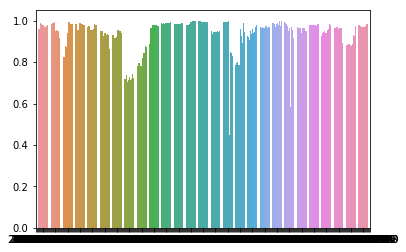

In [99]:
g = sns.barplot(list(daily_dic.keys()), list(daily_dic.values()))

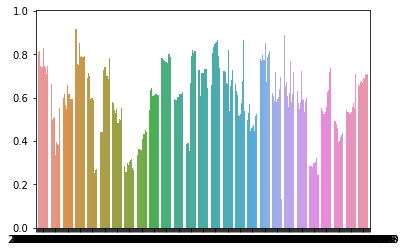

In [153]:
g = sns.barplot(list(daily_dic_mental_health.keys()), list(daily_dic_mental_health.values()))

In [155]:
from scipy.stats.stats import pearsonr   
print (pearsonr( list(daily_dic.values()),list(daily_dic_mental_health.values())))
print (np.corrcoef( list(daily_dic.values()),list(daily_dic_mental_health.values())))

(0.3704092826290931, 3.244227447952938e-13)
[[1.         0.37040928]
 [0.37040928 1.        ]]


# read_gold_bar

In [157]:
path = '/Users/arefeh/Desktop/tweet_api_new/bars-gold/'

In [158]:
bars_list = ['bars',
'bars2',
'bars3',
'bars4',
'bars5',
'bars6',
'bars7',
'bars8',
'bars9',
'bars10',
'bars11',
'bars12',
'bars13',
'bars14',
'bars15',
'bars16',
'bars17',
'bars18']

In [162]:
import json
data_gold = []
for btem in bars_list:
    with open(path+btem) as json_file:
        data_gold = data_gold + (json.load(json_file))

In [200]:
gold_price = {}
for item in data_gold:
    time_gold = item['time']/1000
    gold_price[datetime.utcfromtimestamp(time_gold).strftime('%Y-%m-%d')] = item['close']

In [221]:
gold_val = {}
before = -1
for item in list(daily_dic.keys()):
    if item in list(gold_price.keys()):
        gold_val[item] = gold_price[item]
        before = gold_val[item]
    else:
        gold_val[item] = before
        #print(before)

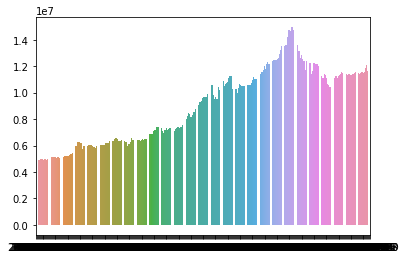

In [222]:
g = sns.barplot(list(gold_val.keys()), list(gold_val.values()))

In [215]:
gold_val['2020-01-10'] = gold_val['2020-01-11']
del gold_val['2021-01-10']

In [223]:
len(gold_val)

362

In [224]:
len(daily_dic)

362

In [240]:
daily_dict_ind = (np.argmin(list(daily_dic.values())[10:150]))
mental_health_min_ind = (np.argmin(list(daily_dic_mental_health.values())[10:150]))

In [246]:
print(list(daily_dic.keys())[daily_dict_ind])
print(list(daily_dic_mental_health.keys())[mental_health_min_ind])

2020-04-08
2020-02-24


In [225]:
print (pearsonr( list(daily_dic.values()),list(gold_val.values())))
print (np.corrcoef( list(daily_dic.values()),list(gold_val.values())))

(0.13801371808106397, 0.008553503037028726)
[[1.         0.13801372]
 [0.13801372 1.        ]]


In [226]:
data_diag = np.array(list(daily_dic.values()))

In [228]:
import numpy as np
from scipy.signal import argrelextrema

# for local maxima
local_max = argrelextrema(data_diag, np.greater)

# for local minima
local_min = argrelextrema(data_diag, np.less)

In [232]:
len(local_min[0])

95

In [229]:
local_min

(array([  2,  10,  15,  17,  21,  23,  26,  28,  31,  33,  39,  46,  49,
         51,  53,  56,  59,  61,  67,  69,  73,  76,  81,  86,  90,  92,
         95,  99, 102, 107, 110, 113, 119, 121, 123, 129, 135, 137, 139,
        149, 152, 155, 159, 162, 164, 172, 180, 183, 185, 187, 191, 197,
        200, 202, 205, 209, 212, 215, 220, 223, 228, 231, 233, 235, 244,
        247, 250, 256, 259, 262, 264, 267, 273, 275, 278, 285, 287, 291,
        296, 298, 303, 307, 309, 313, 318, 324, 327, 332, 335, 337, 341,
        344, 347, 353, 355]),)

In [233]:
len(local_max[0])

94

In [230]:
local_max

(array([  5,  13,  16,  20,  22,  24,  27,  29,  32,  35,  40,  47,  50,
         52,  54,  58,  60,  63,  68,  72,  74,  77,  83,  88,  91,  93,
         98, 101, 104, 109, 111, 118, 120, 122, 127, 130, 136, 138, 146,
        151, 154, 158, 160, 163, 169, 175, 182, 184, 186, 189, 196, 198,
        201, 203, 208, 210, 213, 218, 221, 224, 229, 232, 234, 238, 245,
        249, 255, 257, 261, 263, 268, 274, 276, 281, 286, 289, 295, 297,
        301, 305, 308, 312, 317, 321, 325, 330, 334, 336, 338, 343, 346,
        349, 354, 358]),)

In [48]:
from sklearn.linear_model import LinearRegression

109578

In [ ]:
#vector similarity
siminarity_all_ant = []
n = 0
#vectors_covid
start = time.time()
for item in vectors[0]:
    
    if n%100==0:
        print(n/len(vectors[0]))
        end = time.time()
        print('time')
        print(end - start)
        start = time.time()
    n = n + 1
    siminarity_item_ant = []
    
    #vectors_anti
    for Jtem in vectors[3]:
        siminarity_item_ant.append(cosine_sim(item, Jtem))
        
    siminarity_item_ant = np.array(siminarity_item_ant)
    sorted_ind = list(np.argsort(siminarity_item_ant)[:100])
    sorted_val = siminarity_item_ant[sorted_ind]
        
    siminarity_all_ant.append([sorted_ind,sorted_val])

## vector similarity
similarity_all = []
n = 0
#vectors_covid
for item in vectors[0]:
    
    if n%10==0:
        print(n/len(vectors[0]))
    n = n + 1
    siminarity_item_vac = []
    siminarity_item_ant = []
    siminarity_item_fak = []
    
    #vectors_anti
    for Jtem in vectors[3]:
        siminarity_item_ant.append(cosine_sim(item[0], Jtem[0]))
        
    #    vectors_vac
    for Jtem in vectors[2]:
        siminarity_item_vac.append(cosine_sim(item[0], Jtem[0]))
    #    vectors_fak
    for Jtem in vectors[1]:
        siminarity_item_fak.append(cosine_sim(item[0], Jtem[0]))
        
    similarity_all.append([siminarity_item_vac, siminarity_item_ant, siminarity_item_fak])

In [ ]:
#save similarity file

In [ ]:
with open('/Users/arefeh/Desktop/tweet_api/'+'similarity'+'/'+str('#Covid')+'.txt', 'w') as f:
    n = 0
    print(n)
    for item in similarity_all:
        f.write(str(item)+'\n')

        if n%1000 == 0:
            print(n/len(similarity_all))
        n = n + 1

In [86]:
for i in range(1,2):
    print(i)
    np.savetxt('/Users/arefeh/Desktop/tweet_api/'+'wv_vectors'+'/'+str(search_words[i])+'.txt', np.array(vectors[i]), delimiter=",",fmt='%s')

1


KeyboardInterrupt: 

In [184]:
from sklearn.decomposition import PCA #Grab PCA functions

In [185]:
# fit a 2d PCA model to the vectors
X = vector_doc_sent
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [186]:
import matplotlib
import matplotlib.pyplot as plt

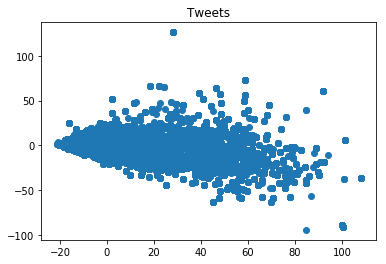

In [187]:
fig, ax = plt.subplots()
ax.plot(result[:, 0], result[:, 1], 'o')
ax.set_title('Tweets')
plt.show()

In [ ]:
#get number of followrwers
tweet_fol = []
n = 0
for ftem in date_list:
    main_path = '/Users/arefeh/Desktop/tweet_api/'+str(search_word)+'/'+ftem+'/'
    number_of_files = sum(f.endswith('.txt') for f in os.listdir(main_path))
    print(n)
    print(number of files)
    n = n + 1

In [106]:
y = list(daily_dic.values())

# Regression Model

In [107]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [115]:
for len_seq in range(5,20):
    x = []
    for i in range(len(y)- len_seq ):
        x.append(y[i:i+len_seq])

    model = LinearRegression().fit(x, y[len_seq:])
    r_sq = model.score(x, y[len_seq:])
    print('\n')
    print(len_seq)
    print('coefficient of determination:', r_sq)



5
coefficient of determination: 0.6129481733544735


6
coefficient of determination: 0.6174935755037464


7
coefficient of determination: 0.6368364149097305


8
coefficient of determination: 0.6367324549984836


9
coefficient of determination: 0.6365742560829253


10
coefficient of determination: 0.6365492845038083


11
coefficient of determination: 0.6369823079156538


12
coefficient of determination: 0.6371866591609359


13
coefficient of determination: 0.6398249322152727


14
coefficient of determination: 0.6397244186423288


15
coefficient of determination: 0.6396496366439215


16
coefficient of determination: 0.6396737295754711


17
coefficient of determination: 0.6397797727904923


18
coefficient of determination: 0.640207961774233


19
coefficient of determination: 0.6420659920229624


In [252]:
def seq_creator(Y,len_seq):
    x = []
    for i in range(len(Y)- len_seq ):
        x.append(Y[i:i+len_seq])
    y = Y[len_seq:]    
    return (x,y)

In [254]:
from sklearn.preprocessing import PolynomialFeatures

In [255]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [258]:
transformer.fit(x_train_seq)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [294]:
x_ = transformer.transform(x_train_seq)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train_seq)

x_test_ = transformer.transform(x_test_seq)
x_test_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test_seq)

In [295]:
model = LinearRegression().fit(x_, y_train_seq)

In [296]:
y_pr_train_seq = model.predict(x_)
r_sq = model.score(x_, y_train_seq)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7569469127842163


In [297]:
y_pr_test_seq = model.predict(x_test_)
r_sq = model.score(x_test_, y_test_seq)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7733308790970297


In [247]:
x_train = x[:300]
y_train = y[:300]
x_test = x[300:]
y_test = y[300:]

In [305]:
len(y_train+y_test)

362

In [253]:
len_seq = 10
[x_train_seq, y_train_seq] = seq_creator(y_train, len_seq)
[x_test_seq, y_test_seq] = seq_creator(y_test, len_seq)

In [288]:
range(len(y_pr_train_seq),len(y_pr_test_seq))

range(290, 52)

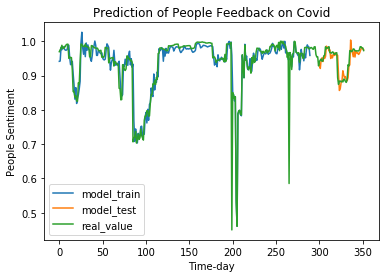

<Figure size 4320x4320 with 0 Axes>

In [317]:
import matplotlib.pyplot as plt
# line 1 points

# plotting the line 1 points 
plt.plot(range(len(y_pr_train_seq)), y_pr_train_seq, label = "model_train")
plt.plot(range(len(y_pr_train_seq)+len_seq,len(y_pr_train_seq)+len(y_pr_test_seq)+len_seq), y_pr_test_seq, label = "model_test")
plt.plot(range(len(y_train+y_test)-len_seq), (y_train+y_test)[len_seq:], label = "real_value")
plt.xlabel('Time-day')
# Set the y axis label of the current axis.
plt.ylabel('People Sentiment')
# Set a title of the current axes.
plt.title('Prediction of People Feedback on Covid')
# show a legend on the plot
plt.legend()
plt.figure(figsize=(60, 60))
# Display a figure.
plt.show()

# Compute Correlation 

In [320]:
path_csv_covid = path_root+'owid-covid-data.csv'

In [342]:
covid_data = pd.read_csv(path_csv_covid)

In [386]:
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61081,ZWE,Africa,Zimbabwe,2021-01-15,26109.0,741.0,921.286,666.0,30.0,28.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61082,ZWE,Africa,Zimbabwe,2021-01-16,26881.0,772.0,911.714,683.0,17.0,28.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61083,ZWE,Africa,Zimbabwe,2021-01-17,27203.0,322.0,818.000,713.0,30.0,29.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61084,ZWE,Africa,Zimbabwe,2021-01-18,27892.0,689.0,799.286,773.0,60.0,35.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [385]:
total_deaths[-2]

4114346.0

In [334]:
total_deaths = covid_data.groupby(['date']).sum()['total_deaths']

In [335]:
total_cases = covid_data.groupby(['date']).sum()['total_cases']

In [354]:
total_deaths['2020-01-22']

34.0

In [387]:
total_deaths_list = list(total_deaths[21:-9])
total_cases_list = list(total_cases[21:-9])

In [371]:
total_cases['2020-01-22']

1114.0

In [372]:
total_deaths_list[0]

36.0

In [380]:
total_cases[21]

1114.0

In [390]:
print (pearsonr( list(daily_dic.values())[6:], total_deaths_list))
print (np.corrcoef( list(daily_dic.values())[6:],total_deaths_list))

(0.1218789693225249, 0.02144248286057458)
[[1.         0.12187897]
 [0.12187897 1.        ]]


In [392]:
print (pearsonr( list(daily_dic.values())[6:], total_cases_list))
print (np.corrcoef( list(daily_dic.values())[6:],total_cases_list))

(0.12384259452919628, 0.019416086751229647)
[[1.         0.12384259]
 [0.12384259 1.        ]]


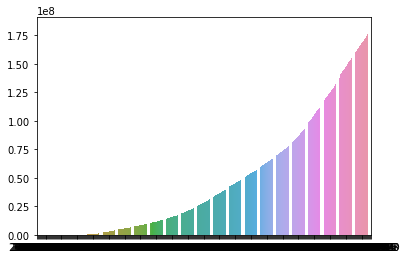

In [399]:
sns.barplot(list(daily_dic.keys())[6:], total_cases_list)

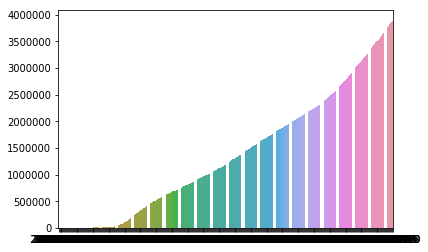

In [400]:
sns.barplot(list(daily_dic.keys())[6:], total_deaths_list)